In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn')
sns.set_palette("husl")

In [4]:
# Load the dataset
# Replace 'path_to_dataset' with the actual path to the dataset file
df = pd.read_csv('/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv')

# 1. Initial Data Exploration
print("=== Dataset Info ===")
print(df.info())
print("\n=== First 5 Rows ===")
print(df.head())
print("\n=== Basic Statistics ===")
print(df.describe())

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB
None

=== First 5 Rows ===
   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2         

In [5]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [6]:
# 2. Check for Missing Values
print("\n=== Missing Values ===")
print(df.isnull().sum())

# Handle missing values (example: fill numerical with median, categorical with mode)
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)


=== Missing Values ===
Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


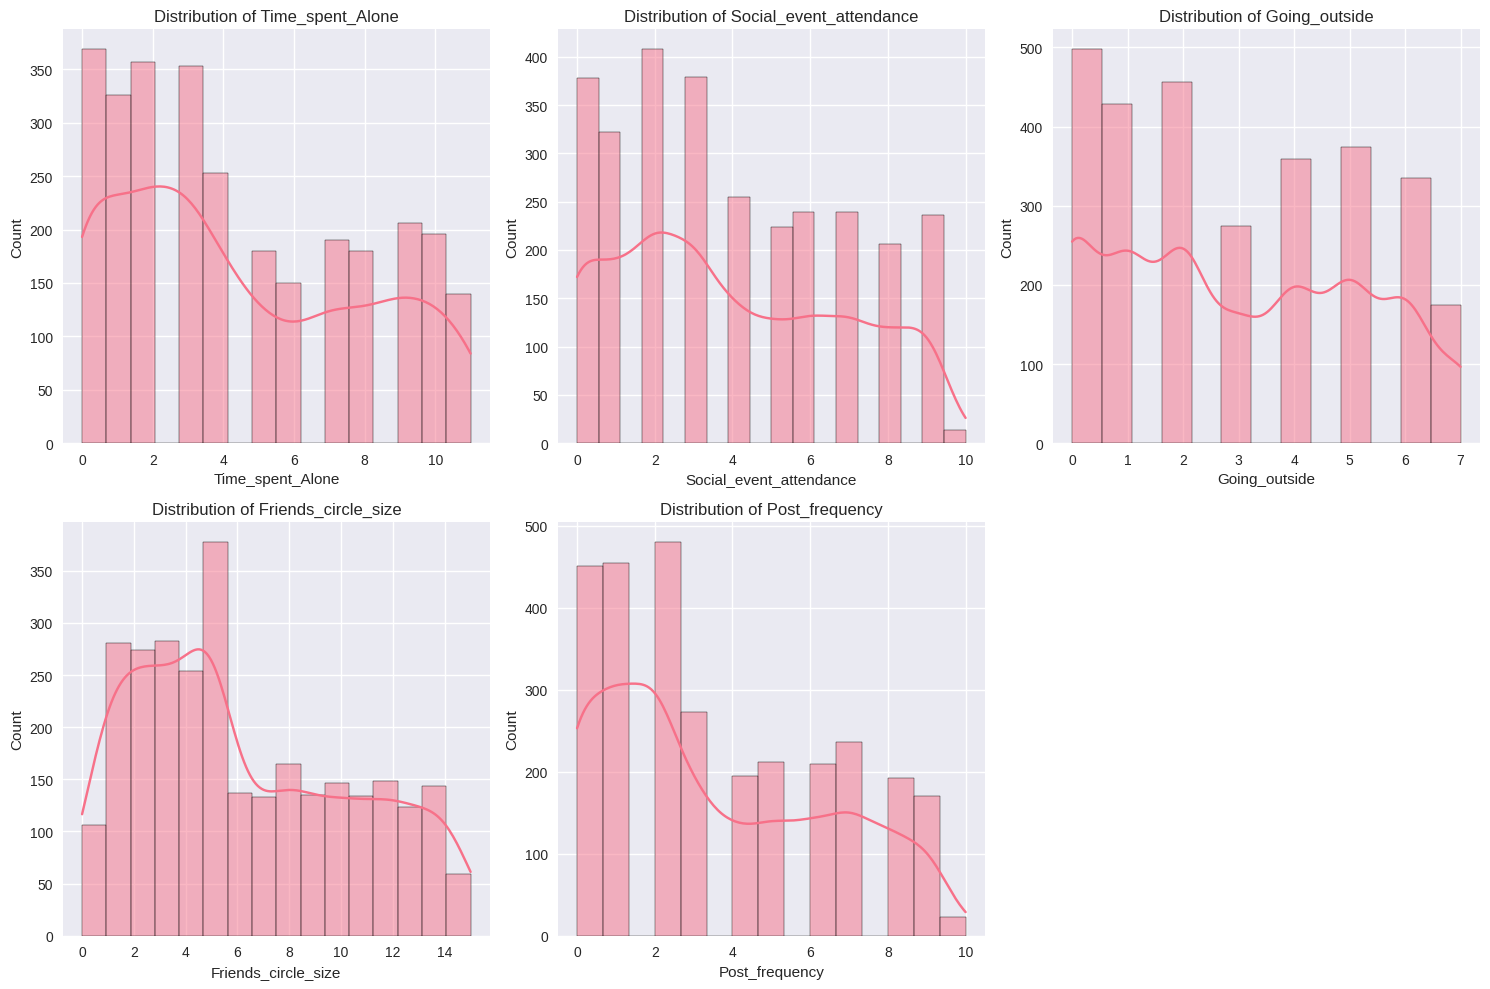

In [7]:
# 3. Data Distribution Analysis
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# 3.1 Histograms for Numerical Features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols)//3 + 1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

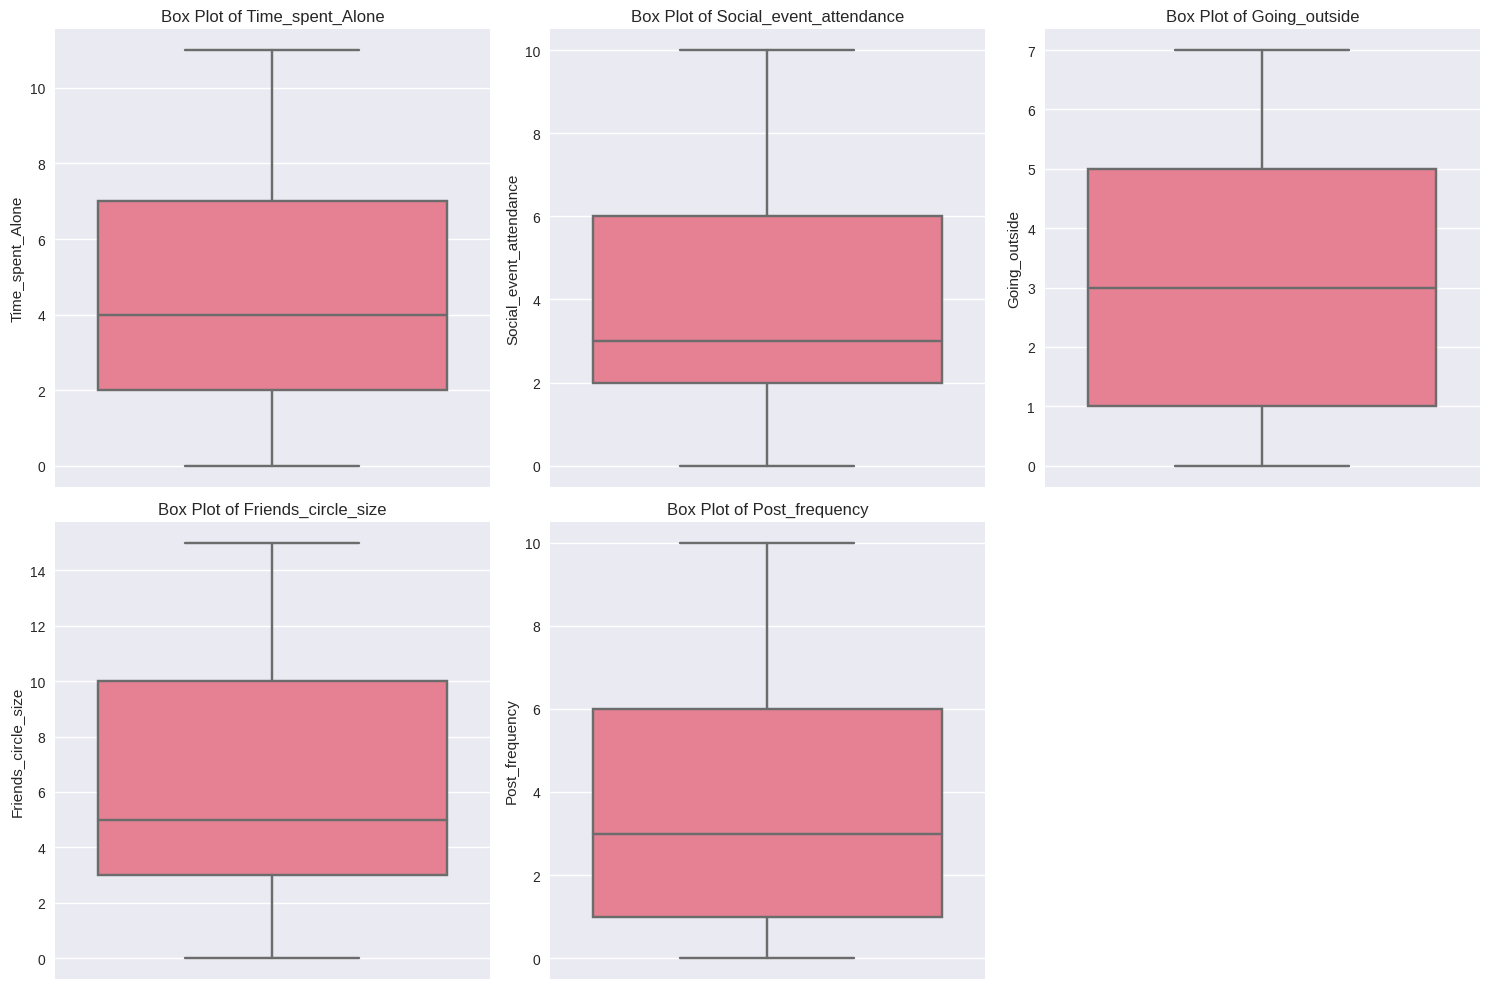

In [8]:
# 3.2 Box Plots for Numerical Features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols)//3 + 1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


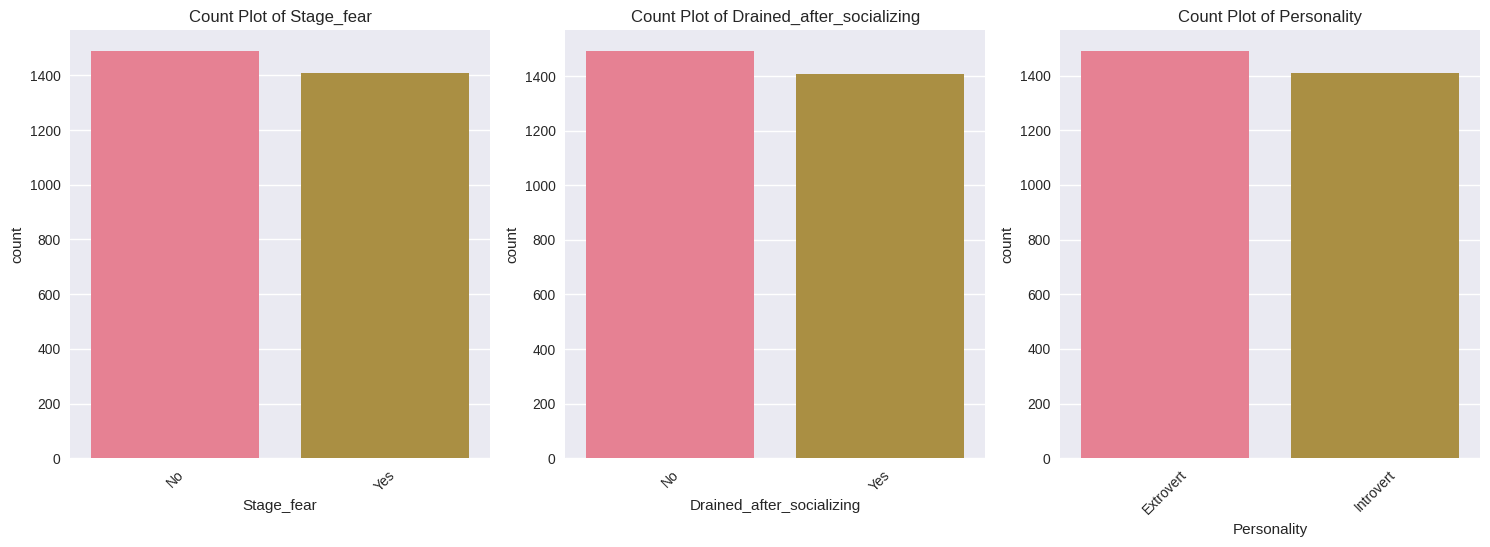

In [9]:

# 4. Categorical Feature Analysis
# Count Plots for Categorical Features
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols)//3 + 1, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

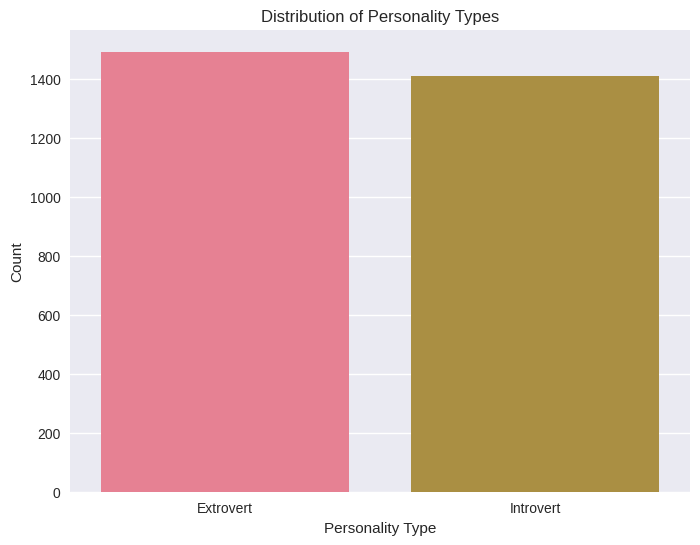

In [22]:
# 5. Target Variable Analysis (assuming 'personality' is the target column)
# Replace 'personality' with actual target column name if different
if 'Personality' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Personality', data=df)
    plt.title('Distribution of Personality Types')
    plt.xlabel('Personality Type')
    plt.ylabel('Count')
    plt.show()

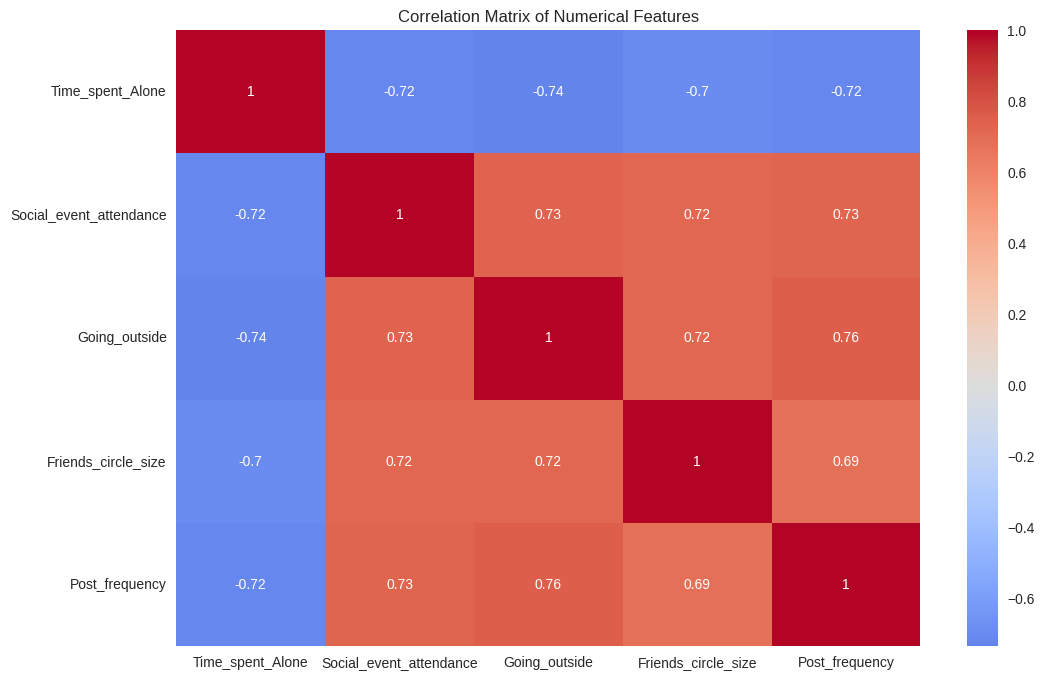

In [11]:
# 6. Correlation Analysis
# Correlation Matrix for Numerical Features
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

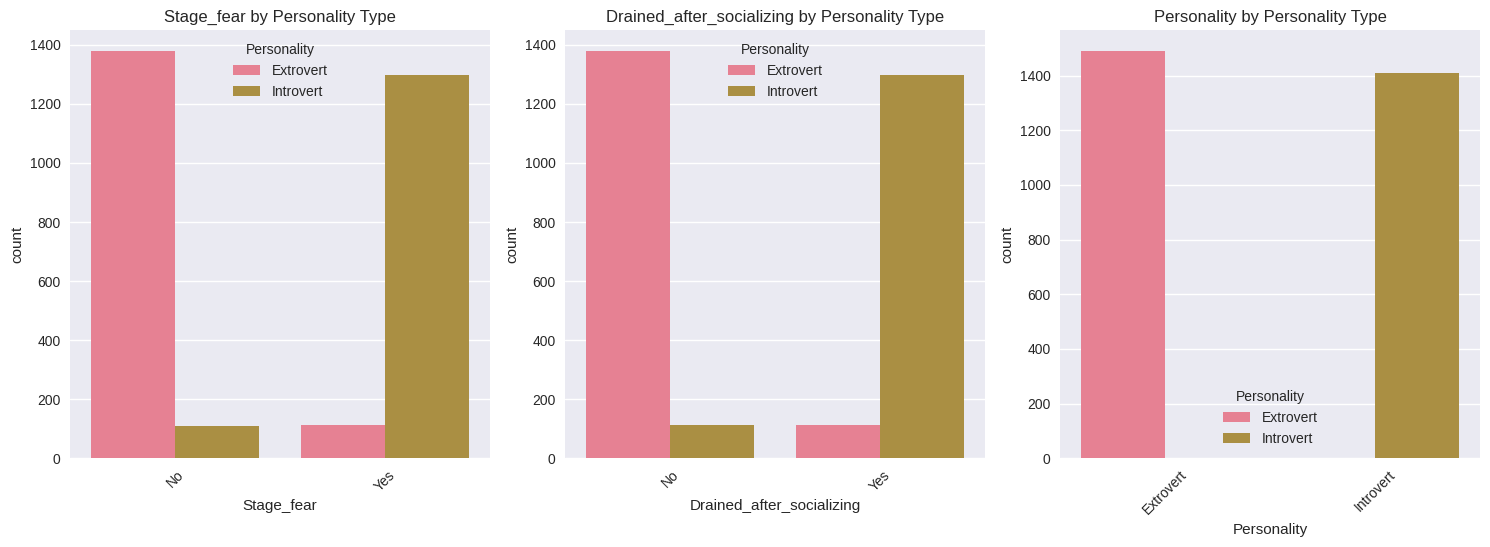

In [20]:
# 7.2 Categorical Features vs Personality (Count Plots with Hue)
if 'Personality' in df.columns:
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(len(categorical_cols)//3 + 1, 3, i)
        sns.countplot(x=col, hue='Personality', data=df)
        plt.title(f'{col} by Personality Type')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

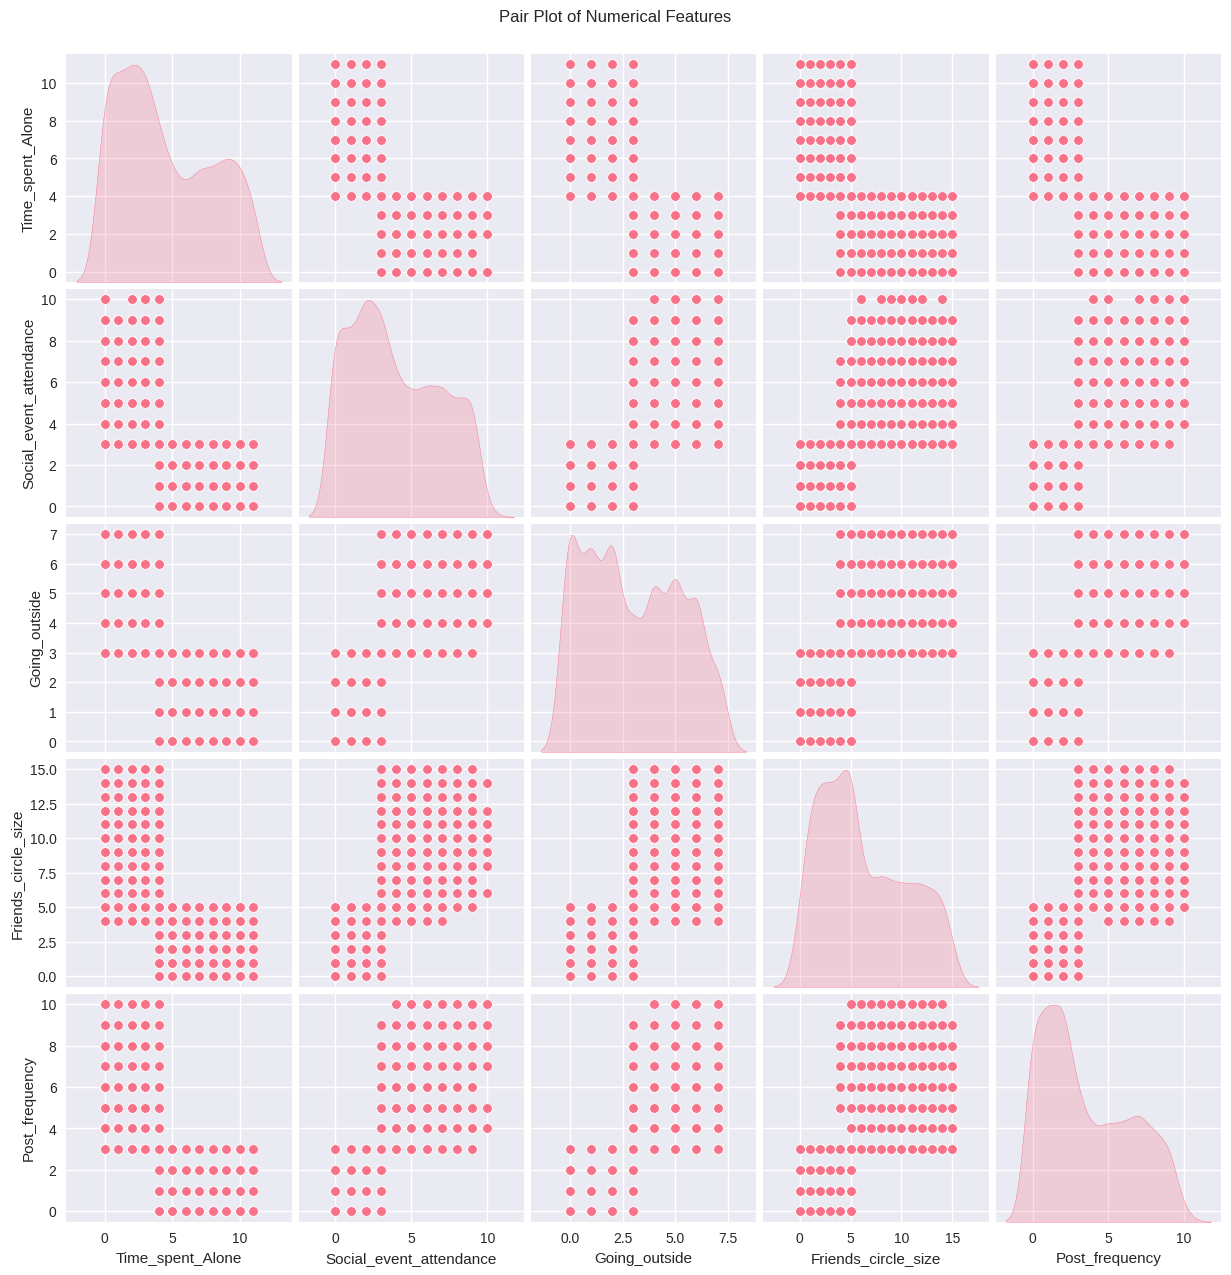

In [13]:
# 8. Pair Plot for Numerical Features
sns.pairplot(df[numerical_cols], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

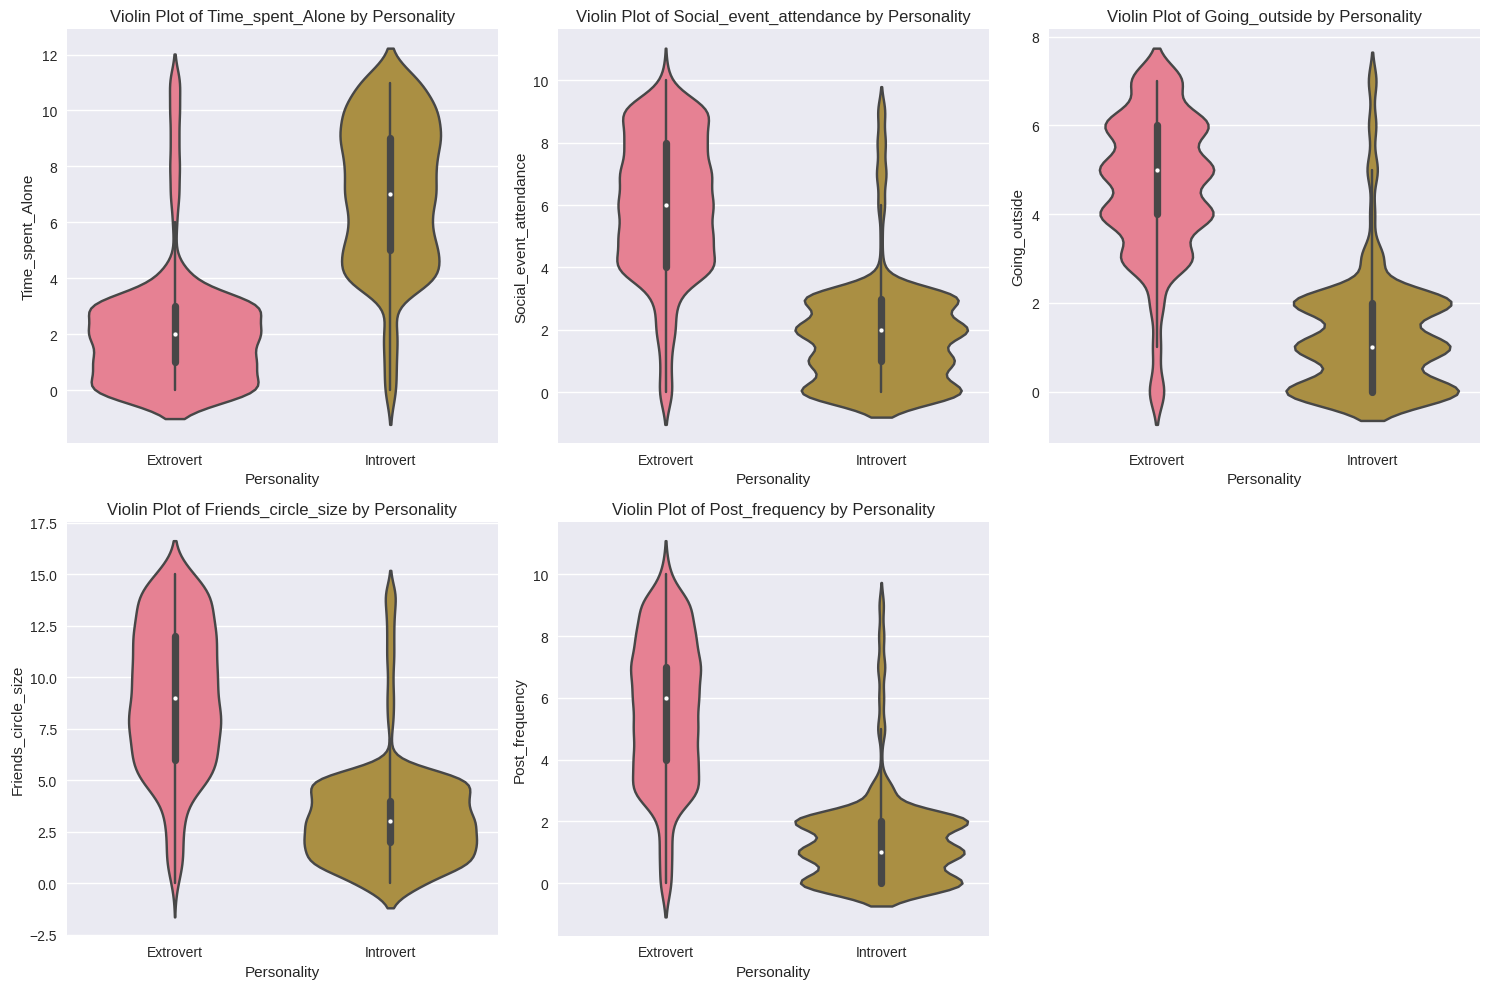

In [15]:
# 9. Violin Plots for Numerical Features by Personality
if 'Personality' in df.columns:
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(len(numerical_cols)//3 + 1, 3, i)
        sns.violinplot(x='Personality', y=col, data=df)
        plt.title(f'Violin Plot of {col} by Personality')
    plt.tight_layout()
    plt.show()


In [16]:
# 10. Statistical Analysis
# T-tests for numerical features between personality types
if 'Personality' in df.columns:
    print("\n=== T-tests for Numerical Features by Personality ===")
    for col in numerical_cols:
        extrovert = df[df['Personality'] == 'Extrovert'][col]
        introvert = df[df['Personality'] == 'Introvert'][col]
        t_stat, p_value = stats.ttest_ind(extrovert, introvert)
        print(f"{col}: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")


=== T-tests for Numerical Features by Personality ===
Time_spent_Alone: t-statistic = -54.6587, p-value = 0.0000
Social_event_attendance: t-statistic = 56.1054, p-value = 0.0000
Going_outside: t-statistic = 59.0948, p-value = 0.0000
Friends_circle_size: t-statistic = 50.8000, p-value = 0.0000
Post_frequency: t-statistic = 55.9839, p-value = 0.0000



=== Outlier Detection (Z-score > 3) ===
Time_spent_Alone: 0 outliers
Social_event_attendance: 0 outliers
Going_outside: 0 outliers
Friends_circle_size: 0 outliers
Post_frequency: 0 outliers


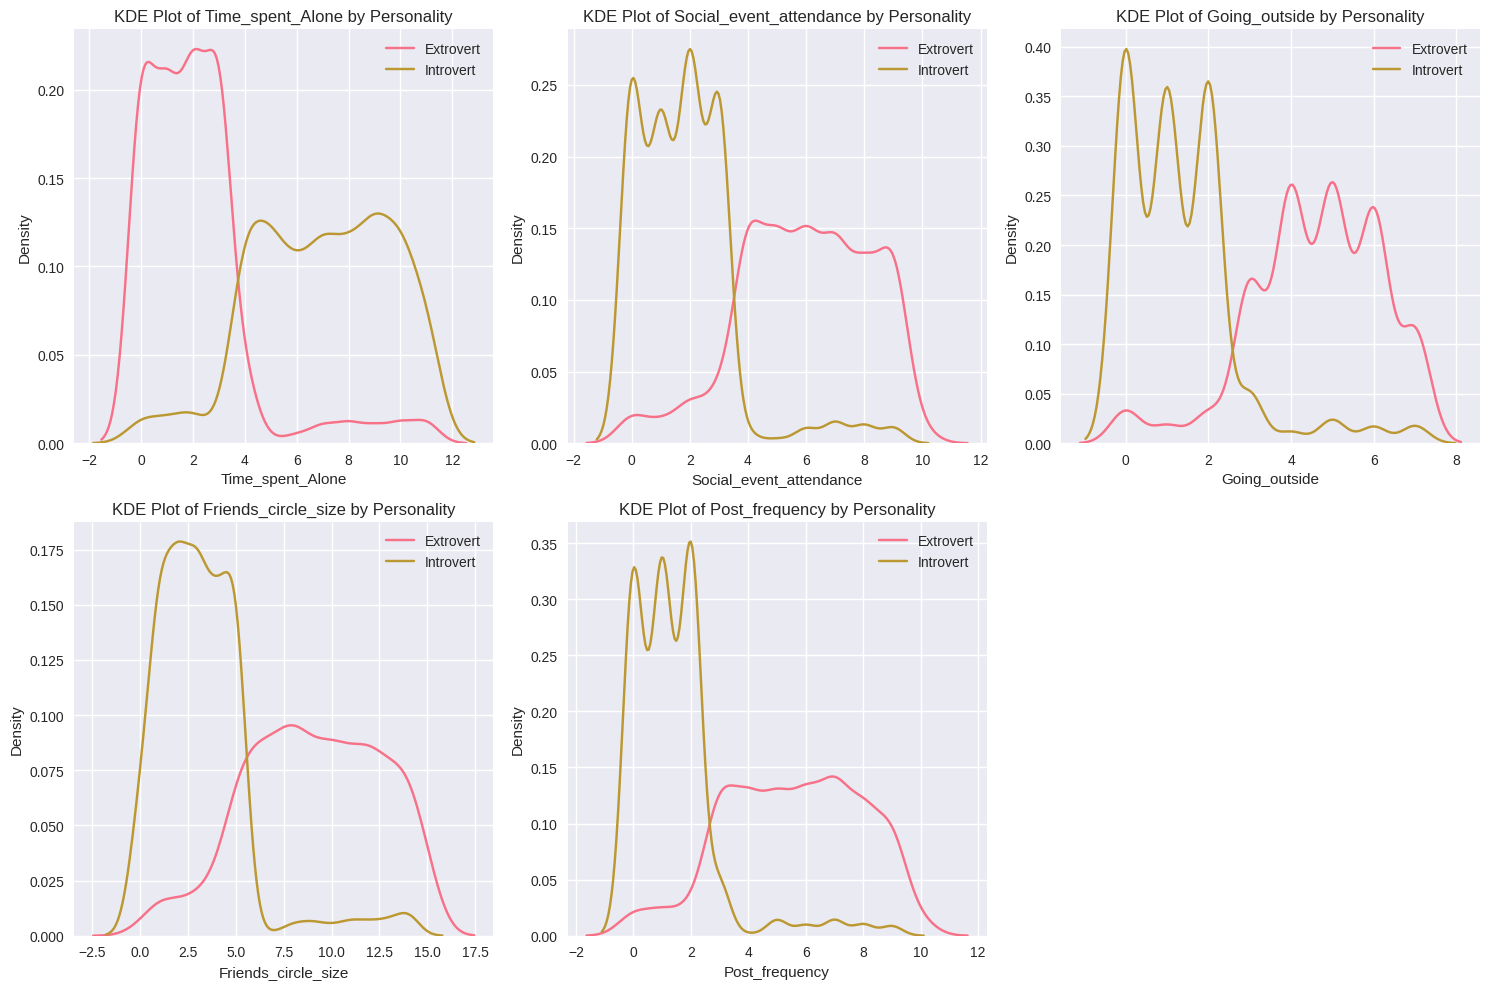

In [18]:
# 12. Outlier Detection
print("\n=== Outlier Detection (Z-score > 3) ===")
for col in numerical_cols:
    z_scores = np.abs(stats.zscore(df[col]))
    outliers = df[z_scores > 3][col]
    print(f"{col}: {len(outliers)} outliers")

# 13. Distribution Comparison (KDE Plots)
if 'Personality' in df.columns:
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(len(numerical_cols)//3 + 1, 3, i)
        for personality_type in df['Personality'].unique():
            sns.kdeplot(df[df['Personality'] == personality_type][col], label=personality_type)
        plt.title(f'KDE Plot of {col} by Personality')
        plt.legend()
    plt.tight_layout()
    plt.show()


In [19]:
# 14. Summary Report
print("\n=== EDA Summary ===")
print(f"Dataset Shape: {df.shape}")
print(f"Numerical Features: {len(numerical_cols)}")
print(f"Categorical Features: {len(categorical_cols)}")
print(f"Missing Values Handled: {df.isnull().sum().sum() == 0}")
if 'personality' in df.columns:
    print(f"Personality Distribution:\n{df['personality'].value_counts(normalize=True)}")


=== EDA Summary ===
Dataset Shape: (2900, 8)
Numerical Features: 5
Categorical Features: 3
Missing Values Handled: True


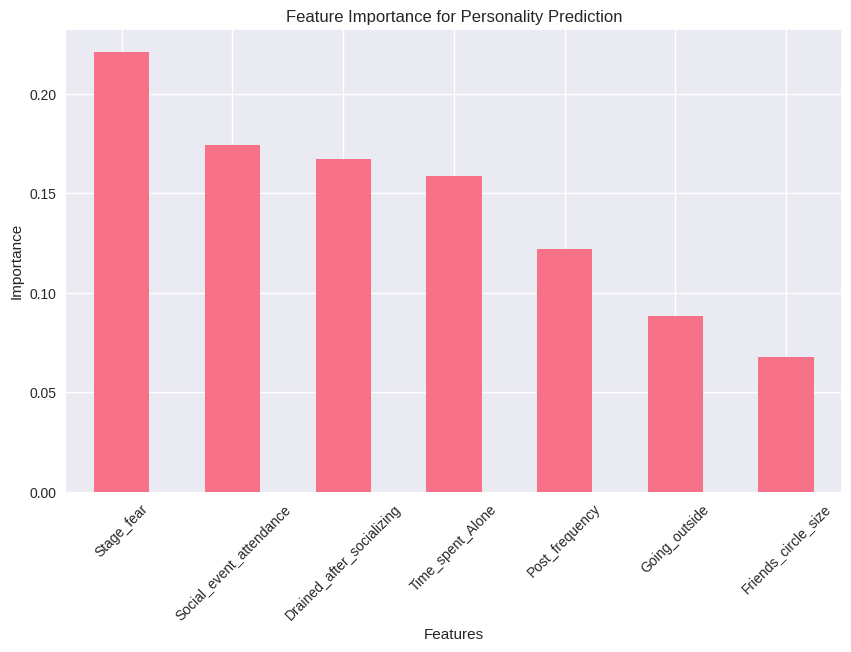

In [23]:
# 11. Feature Importance Analysis (using Random Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

if 'Personality' in df.columns:
    # Prepare data
    X = df.drop('Personality', axis=1)
    y = df['Personality']
    
    # Encode categorical variables
    for col in X.select_dtypes(include=['object']).columns:
        X[col] = LabelEncoder().fit_transform(X[col])
    
    # Train Random Forest
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X, y)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
    feature_importance.sort_values(ascending=False).plot(kind='bar')
    plt.title('Feature Importance for Personality Prediction')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45)
    plt.show()